# Heart Disease Indicator

# Dataset Feature Description

- HeartDiseaseorAttack: Target variable indicating whether the individual has heart disease or has had a heart attack.
- HighBP: Indicator of whether the individual has high blood pressure.
- HighChol: Indicator of whether the individual has high cholesterol.
- CholCheck: Indicator of whether the individual has had a cholesterol check in the past five years.
- BMI: Body Mass Index, a measure of body fat based on height and weight.
- Smoker: Indicator of whether the individual is a current smoker.
- Stroke: Indicator of whether the individual has ever had a stroke.
- Diabetes: Indicator of whether the individual has diabetes.
- PhysActivity: Indicator of whether the individual has engaged in physical activity in the past month.
- Fruits: Indicator of whether the individual consumes fruits regularly.
- Veggies: Indicator of whether the individual consumes vegetables regularly.
- HvyAlcoholConsump: Indicator of heavy alcohol consumption.
- AnyHealthcare: Indicator of whether the individual has any form of healthcare coverage.
- NoDocbcCost: Indicator of whether the individual could not see a doctor in the past year due to cost.
- GenHlth: Self-reported general health status.
- MentHlth: Number of days mental health was not good in the past month.
- PhysHlth: Number of days physical health was not good in the past month.
- DiffWalk: Indicator of whether the individual has difficulty walking or climbing stairs.
- Sex: Gender of the individual (e.g., Male, Female).
- Age: Age of the individual.
- Education: Education level of the individual.
- Income: Income level of the individual.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv("C:/Users/Admin/Downloads/Heart_Desease_Indicators.csv")

In [3]:
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
data.shape

(253680, 22)

In [8]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
data.kurtosis()

HeartDiseaseorAttack     5.721451
HighBP                  -1.917701
HighChol                -1.905720
CholCheck               21.826983
BMI                     10.997473
Smoker                  -1.947661
Stroke                  19.690969
Diabetes                 1.980148
PhysActivity            -0.570674
Fruits                  -1.689208
Veggies                  0.535228
HvyAlcoholConsump       12.854433
AnyHealthcare           15.481851
NoDocbcCost              6.971817
GenHlth                 -0.383261
MentHlth                 6.441684
PhysHlth                 3.496242
DiffWalk                 1.146757
Sex                     -1.942247
Age                     -0.581223
Education                0.039453
Income                  -0.280329
dtype: float64

In [10]:
data.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


# EDA

In [11]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Distribution of the Target Variable (HeartDiseaseorAttack)

In [12]:
data['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

**The dataset is imbalanced, with a significantly higher number of individuals not having heart disease or an attack (0.0) compared to those who do (1.0). This imbalance could affect model performance, and you might need to apply techniques such as resampling, SMOTE (Synthetic Minority Over-sampling Technique), or adjusting class weights to handle it effectively.**

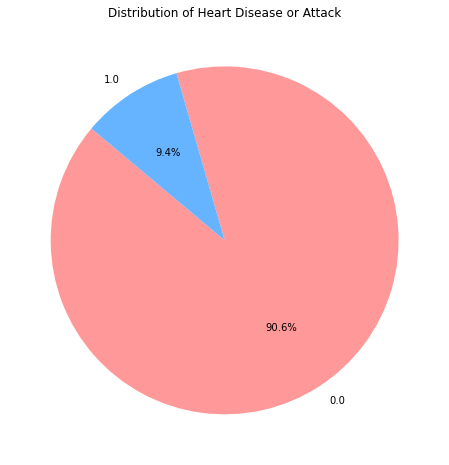

In [13]:

# Count the occurrences of each class
heart_disease_counts = data['HeartDiseaseorAttack'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Heart Disease or Attack')
plt.show()


# Distribution of Binary Features

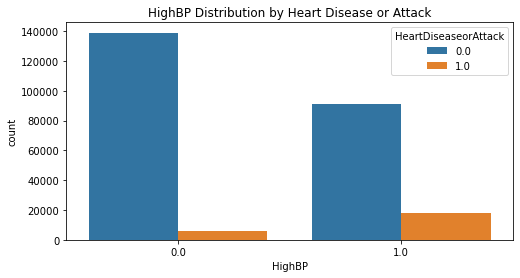

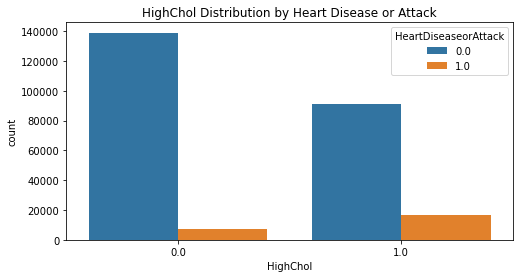

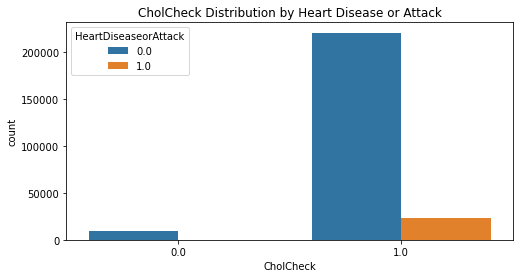

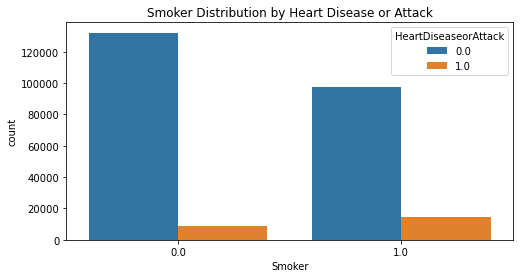

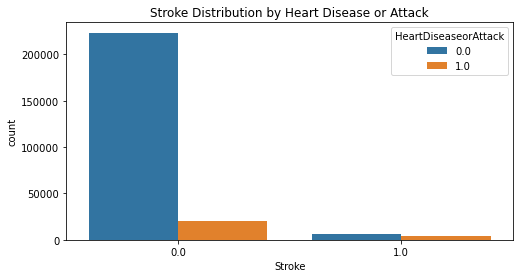

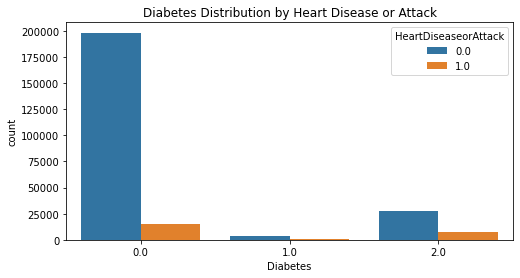

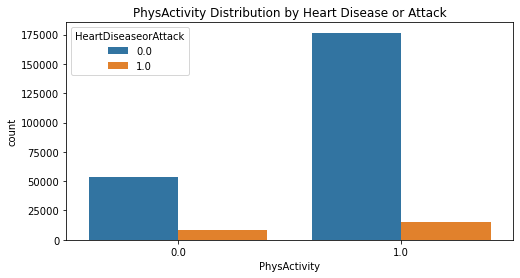

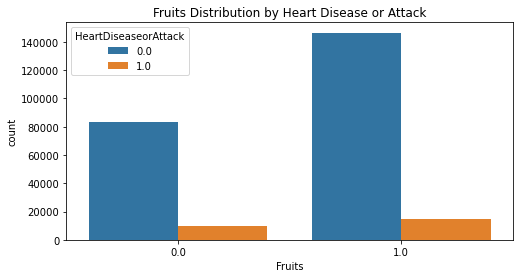

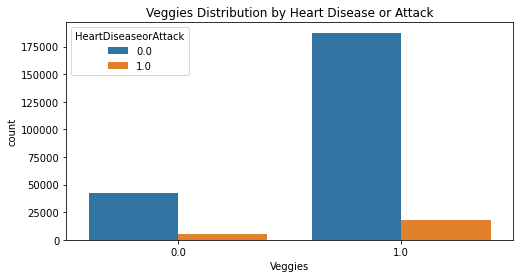

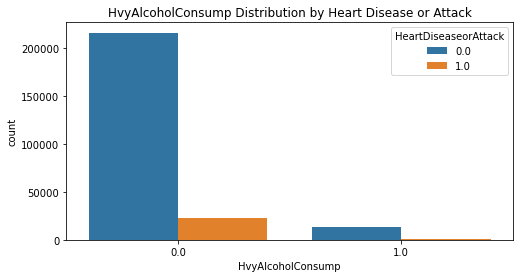

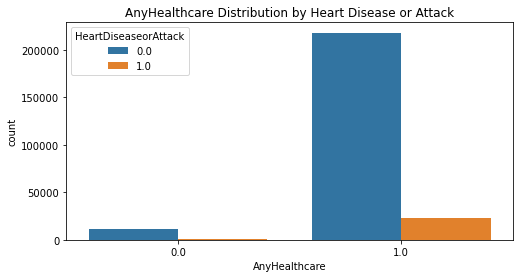

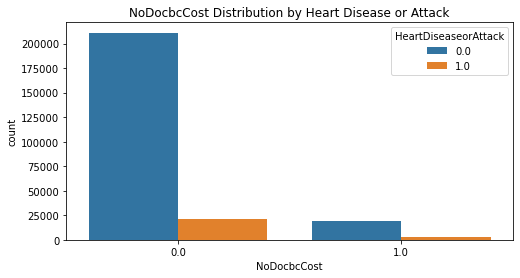

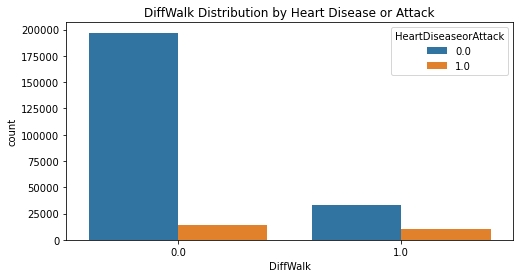

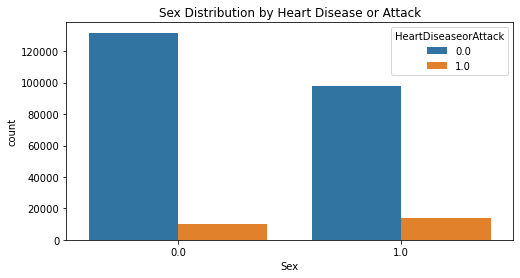

In [14]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                   'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
for feature in binary_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='HeartDiseaseorAttack', data=data)
    plt.title(f'{feature} Distribution by Heart Disease or Attack')
    plt.show()


# Health Condition Analysis


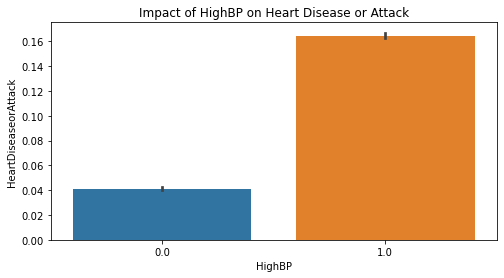

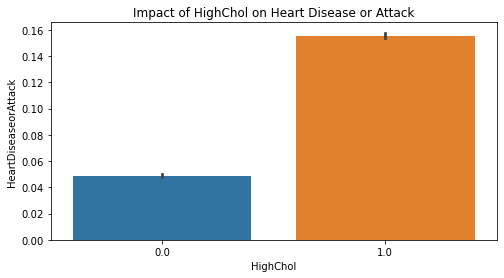

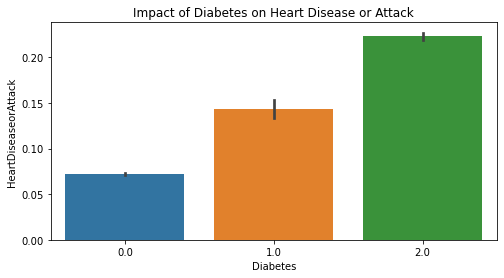

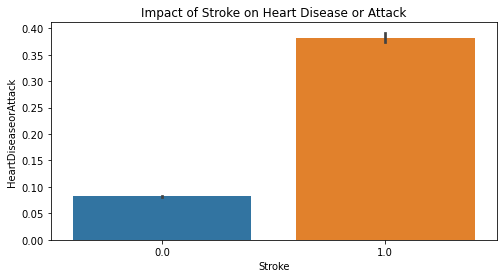

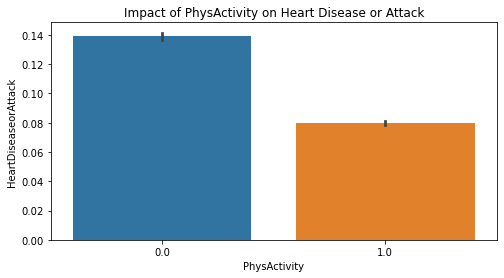

In [15]:
health_conditions = ['HighBP', 'HighChol', 'Diabetes', 'Stroke', 'PhysActivity']
for condition in health_conditions:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=condition, y='HeartDiseaseorAttack', data=data)
    plt.title(f'Impact of {condition} on Heart Disease or Attack')
    plt.show()


the  stroke,diabetes,highchol,highbp  has a significant impact on increasing the likelihood of heart disease or attack. This visual evidence supports the hypothesis that stroke,diabetes,highchol,highbp are at a higher risk of developing heart-related issues 

# Relationship Between HeartDiseaseorAttack and Continuous Features

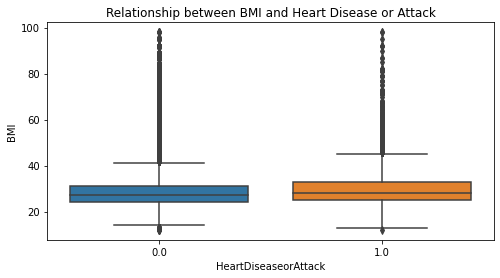

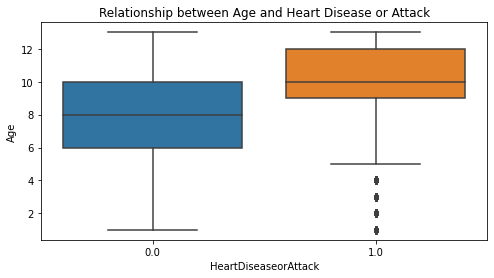

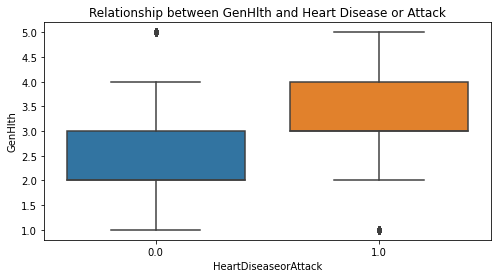

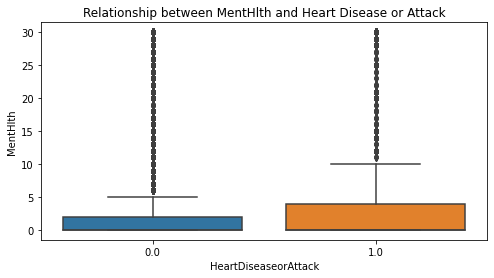

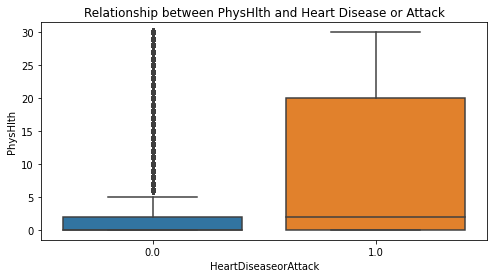

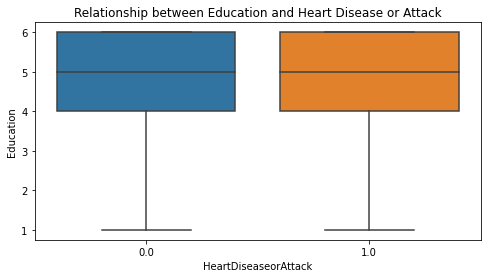

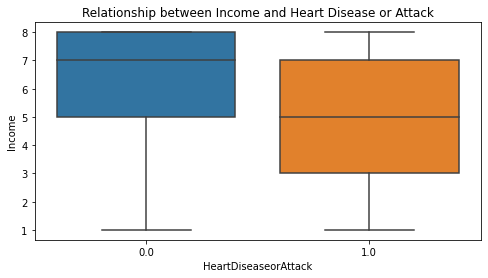

In [17]:
continuous_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='HeartDiseaseorAttack', y=feature, data=data)
    plt.title(f'Relationship between {feature} and Heart Disease or Attack')
    plt.show()


**BMI: While BMI does not show a strong difference between individuals with and without heart disease or attack, extreme BMI values might still pose a risk.**

**Age: Age shows a more clear relationship, with older individuals being more likely to suffer from heart disease or attack. This suggests that age is a more significant predictor compared to BMI in this context.**

#  Distribution of Continuous Features

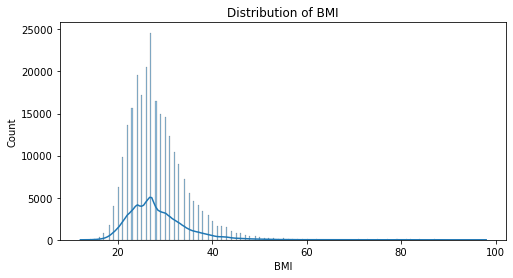

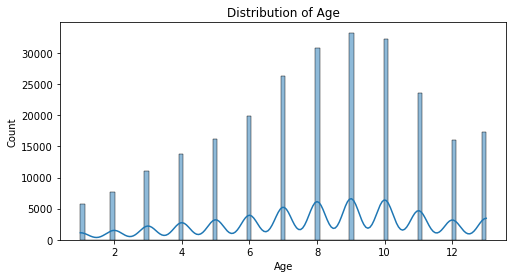

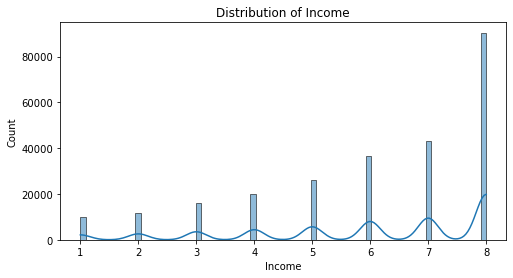

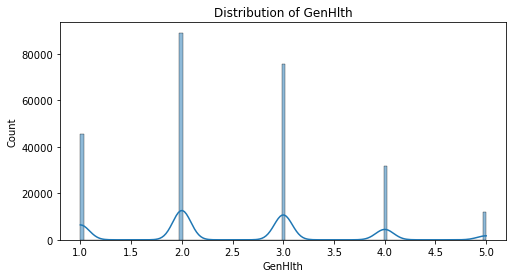

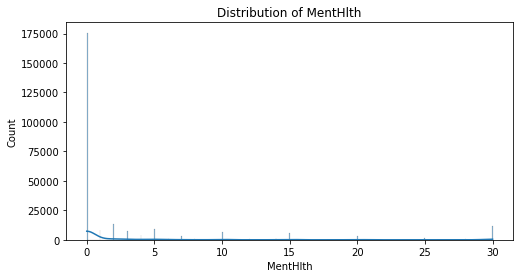

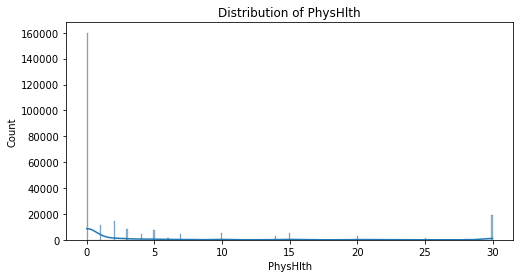

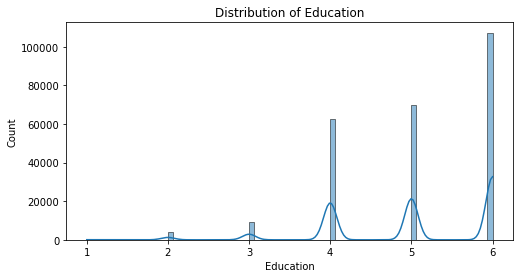

In [18]:
continuous_features = ['BMI', 'Age', 'Income','GenHlth', 'MentHlth', 'PhysHlth', 'Education']
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


# 7. Impact of Lifestyle Choices
Question: How do lifestyle choices like smoking (Smoker), alcohol consumption (HvyAlcoholConsump), and diet (Fruits, Veggies) affect heart disease?


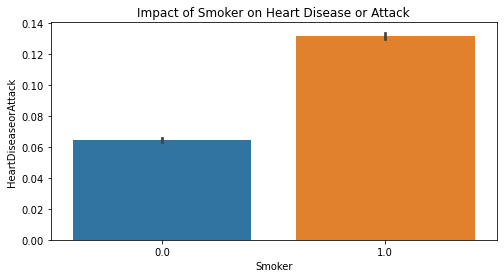

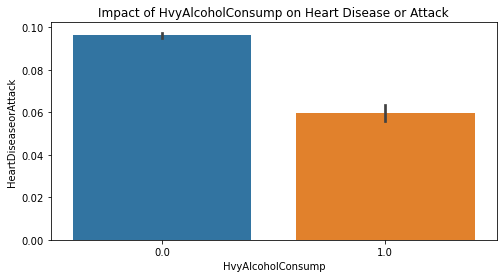

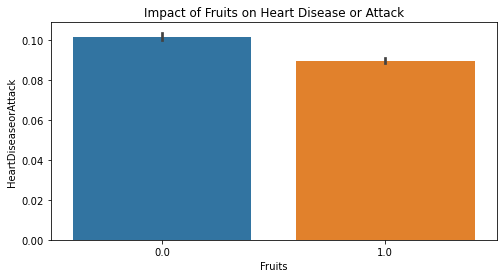

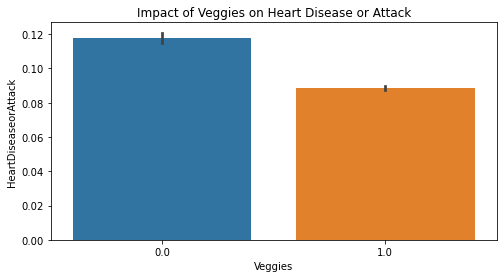

In [19]:
lifestyle_features = ['Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']
for feature in lifestyle_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=feature, y='HeartDiseaseorAttack', data=data)
    plt.title(f'Impact of {feature} on Heart Disease or Attack')
    plt.show()


**the smoking has a significant impact on increasing the likelihood of heart disease or attack. This visual evidence supports the hypothesis that smokers are at a higher risk of developing heart-related issues compared to non-smokers.**



# Effect of General and Mental Health
Question: How do general health (GenHlth) and mental health (MentHlth) relate to heart disease or attack?

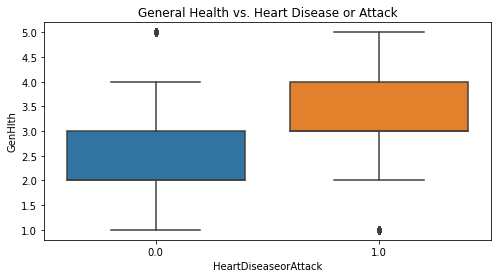

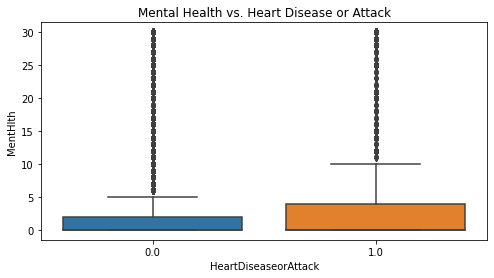

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='HeartDiseaseorAttack', y='GenHlth', data=data)
plt.title('General Health vs. Heart Disease or Attack')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='HeartDiseaseorAttack', y='MentHlth', data=data)
plt.title('Mental Health vs. Heart Disease or Attack')
plt.show()


# Feature importants

In [25]:
target='HeartDiseaseorAttack'
X_train, X_test, y_train, y_test = train_test_split(data[binary_features],data[target], test_size=0.2, random_state=42)


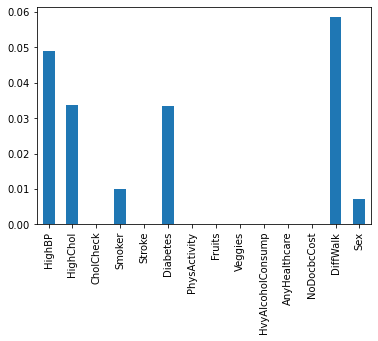

In [26]:
from sklearn.linear_model import Lasso

# Train a Lasso model
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

# Get the coefficients
feature_importance = pd.Series(model.coef_, index=X_train.columns)

# Plot the coefficients
feature_importance.plot(kind='bar')
plt.show()


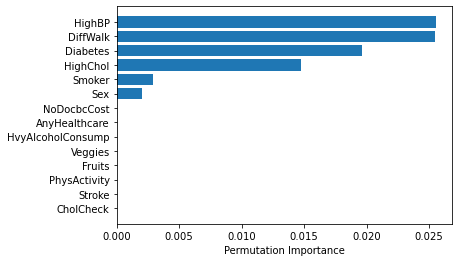

In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

plt.barh(X_test.columns[perm_sorted_idx], result.importances_mean[perm_sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


**Age, and ,sex,diabetes,highbp,highchol,physchealth,genhealth are the  most important features impacting the likelihood of heart disease or an attack, with BMI being the most significant.**

In [47]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature coefficients
coefficients = logreg.coef_[0]
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of the coefficients
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Display
print(feature_importance_df)


              Feature  Coefficient
4              Stroke     0.984463
13                Sex     0.755832
1            HighChol     0.607427
0              HighBP     0.525977
16            GenHlth     0.494650
2           CholCheck     0.435080
3              Smoker     0.362062
12           DiffWalk     0.294590
15                Age     0.253718
11        NoDocbcCost     0.233066
5            Diabetes     0.152874
6        PhysActivity     0.052345
8             Veggies     0.045263
19          Education     0.015005
7              Fruits     0.006033
17           MentHlth     0.002375
14                BMI     0.001183
18           PhysHlth     0.001001
10      AnyHealthcare    -0.035399
20             Income    -0.044339
9   HvyAlcoholConsump    -0.290352


**Stroke (highest positive effect),Sex,HighChol,HighBP,GenHlth.**

These features are the most influential in predicting heart disease according to your logistic regression model. They have the highest positive coefficients, meaning that increases in these features are associated with a higher likelihood of heart disease or heart attack.

# Model training

# 1. Model Development with Binary Features Only:

Create two different classifiers using only the binary features from the dataset.
Ensure that you try different algorithms to see which performs best with the binary features.


In [28]:
# Identify binary and continuous features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                   'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
continuous_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']


In [29]:
len(continuous_features)

7

In [30]:
len(binary_features)

14

In [31]:
target='HeartDiseaseorAttack'

In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[binary_features],data[target], test_size=0.2, random_state=42)
# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'XGBoost ': XGBClassifier()
}

#train and evaluate each model
for model_name,model in models.items():
    model.fit(X_train_resampled,y_train_resampled)
    y_pred=model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    accuracy=accuracy_score(y_test,y_pred)
    print(f'{model_name} Accuracy : {accuracy:.2f}')
    print(f'{model_name} roc_auc : {roc_auc:.2f}','\n')
    

Logistic Regression Accuracy : 0.72
Logistic Regression roc_auc : 0.80 

Decision Tree Accuracy : 0.73
Decision Tree roc_auc : 0.76 

Random Forest Accuracy : 0.73
Random Forest roc_auc : 0.76 

Bernoulli Naive Bayes Accuracy : 0.72
Bernoulli Naive Bayes roc_auc : 0.80 

XGBoost  Accuracy : 0.72
XGBoost  roc_auc : 0.79 



**Logistic Regression and Bernoulli Naive Bayes have the highest ROC-AUC score of 0.80, indicating better performance in distinguishing between the positive and negative classes compared to the other models.**

Decision Tree and Random Forest have lower ROC-AUC scores (0.76), which may suggest that these models are less effective in handling the class imbalance or capturing the underlying patterns in the data compared to Logistic Regression and Bernoulli Naive Bayes.

XGBoost also performs well with a ROC-AUC of 0.79, which is close to the top performers.




# 2. Model Development with Both Continuous and Binary Features:

**Create a classifier that utilizes both continuous and binary features from the dataset.**

**Select the appropriate algorithm that can handle mixed types of features.**

In [33]:
# Identify binary and continuous features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                   'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
continuous_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

mixed_features = binary_features + continuous_features

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Identify binary and continuous features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                   'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
continuous_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

# Separate features and target variable
X = data[binary_features + continuous_features]
y = data['HeartDiseaseorAttack']  # Update to your target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} ROC-AUC: {roc_auc:.2f}', '\n')


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.75
Logistic Regression ROC-AUC: 0.84 

Decision Tree Accuracy: 0.85
Decision Tree ROC-AUC: 0.59 

Random Forest Accuracy: 0.90
Random Forest ROC-AUC: 0.81 

Bernoulli Naive Bayes Accuracy: 0.78
Bernoulli Naive Bayes ROC-AUC: 0.80 

XGBoost Accuracy: 0.91
XGBoost ROC-AUC: 0.84 



The XGBoost model was evaluated using a dataset that included both binary and continuous features, achieving an accuracy of 0.91. 

# Hybrid Model Development:

**Build a hybrid classifier where:
Gaussian Naive Bayes is used for the continuous features.**

**Bernoulli Naive Bayes is used for the binary features.**

**Finally, create an ensemble of the models using the VotingClassifier.**

In [35]:
# Assuming continuous_features and binary_features are already defined
continuous_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                   'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

X_continuous = data[continuous_features]
X_binary= data[binary_features]
y = data['HeartDiseaseorAttack']  # Assuming this is the target variable


In [36]:
# Split the data
X_train_cont, X_test_cont, y_train, y_test = train_test_split(X_continuous, y, test_size=0.2, random_state=42)
X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)


In [37]:
# Initialize the models
gaussian_nb = GaussianNB()
bernoulli_nb = BernoulliNB()

# Train the models

bernoulli_nb.fit(X_train_bin, y_train)

BernoulliNB()

In [38]:
gaussian_nb.fit(X_train_cont, y_train)

GaussianNB()

# Creating voting classifier

In [44]:
# Split the data for continuous and binary features
X_train_cont, X_test_cont, y_train, y_test = train_test_split(X_continuous, y, test_size=0.2, random_state=42)
X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Concatenate continuous and binary features into single train and test datasets
X_train_full = pd.concat([X_train_cont.reset_index(drop=True), X_train_bin.reset_index(drop=True)], axis=1)
X_test_full = pd.concat([X_test_cont.reset_index(drop=True), X_test_bin.reset_index(drop=True)], axis=1)

# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)


# Initialize models
gaussian_nb = GaussianNB()
bernoulli_nb = BernoulliNB()

# Create a pipeline for GaussianNB to scale continuous features
gaussian_pipeline = make_pipeline(StandardScaler(), gaussian_nb)

# Combine the models using VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('gaussian_nb', gaussian_pipeline),
    ('bernoulli_nb', bernoulli_nb)
], voting='soft')  # You can also use voting='hard'

# Train the VotingClassifier on the full dataset
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = voting_clf.predict(X_test_full)
score=accuracy_score(y_test,y_pred)
# Evaluate the model
print(f'Accuracy: {score: .2f}')
print(classification_report(y_test, y_pred))

Accuracy:  0.76
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     45968
         1.0       0.24      0.71      0.36      4768

    accuracy                           0.76     50736
   macro avg       0.60      0.74      0.60     50736
weighted avg       0.89      0.76      0.80     50736



**After applying SMOTE to balance the dataset, the model's accuracy dropped to 0.76. While the drop in accuracy might seem negative, the performance for the minority class (class 1.0, heart disease) has improved significantly, especially in terms of recall.**

# Why SMOTE over Undersampling or Other Techniques:

1.Preserves Majority Class Data: Unlike undersampling, which discards valuable majority class data, SMOTE retains all data while synthetically generating new minority class samples, ensuring no information is lost.

2.Avoids Overfitting: SMOTE creates synthetic examples based on feature similarities rather than duplicating minority class samples, unlike random oversampling, reducing the risk of overfitting.

3.Balances Without Data Loss: SMOTE increases the representation of the minority class while preserving the full data distribution, which is especially important in critical use cases like healthcare, where losing data could hinder model performance.

4.Better for Recall: In imbalanced datasets (e.g., heart disease prediction), SMOTE improves the model's recall for the minority class without sacrificing the majority class performance. This is crucial for catching more positive cases.

Overall, SMOTE offers a more balanced approach, retaining all data while improving the model's ability to learn from minority class examples.

**The insights derived from this project were highly actionable. For instance, identifying key risk factors like Age, Sex,Stroke, Diabetes, High Blood Pressure, and BMI,Physical Health,General Health,High Chol,Diff Walking,Smoker allowed us to focus on preventive measures for individuals at higher risk. The model's ability to predict heart disease can guide healthcare providers in making early interventions, potentially reducing the incidence of heart disease and improving patient outcomes. This project demonstrated how data-driven approaches could be pivotal in making informed decisions in healthcare**